In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
df_aless = pd.read_csv('./dados/amazon.tsv',sep = '\t')

In [18]:
df_aless.head()
#Feedback => 1 (gostou) 0(não gostou)
#Ratings => 1,2,3,4,5... são as notas

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [22]:
df_aless.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [50]:
# Adicionar quem deu feedback ruim 
ruim = [linha for linha in df_aless['feedback']  if linha == 0]
# Adicionar quem deu feeback bom
bom = [linha for linha in df_aless['feedback']  if linha == 1]

#porcentagem de bom e ruim
len(bom)/(len(df_aless['feedback'])),len(ruim)/(len(df_aless['feedback']))

#91% classficiaram como BOM
#8% classificaram como Ruim

(0.9184126984126985, 0.08158730158730158)

In [51]:
"""for linha in df_aless['feedback']:
    if linha== 0:
        print('oi')"""
#Teste..

"for linha in df_aless['feedback']:\n    if linha== 0:\n        print('oi')"

### Começa aqui, vamos trabalhar com a coluna "verified_reviews"

In [24]:
# Aqui estão os textos que queremos analisar
df_aless['verified_reviews'].head()

0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object

In [30]:
#Exemplo
df_aless['verified_reviews'][0],df_aless['verified_reviews'][1]

('Love my Echo!', 'Loved it!')

In [33]:
positive = df_aless[df_aless['feedback'] == 1]
positive.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [37]:
negative = df_aless[df_aless['feedback'] == 0]
negative.head()

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0


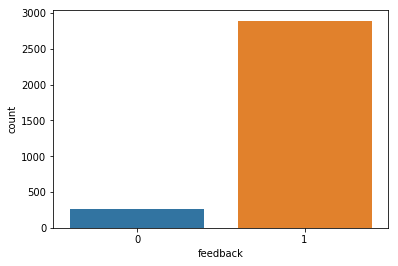

In [52]:
sns.countplot(df_aless['feedback'], label = 'Counts')

Temos uma base de dados bem desbalanceada... isso dificulta para fazer previsões

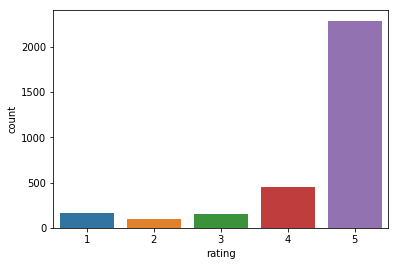

In [53]:

# Ratings = NOTAS


sns.countplot(x = 'rating', data = df_aless)

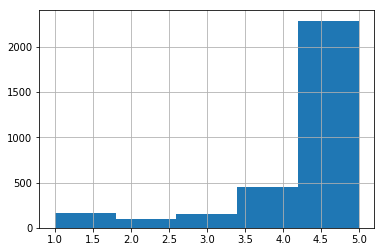

In [56]:
df_aless['rating'].hist(bins = 5)

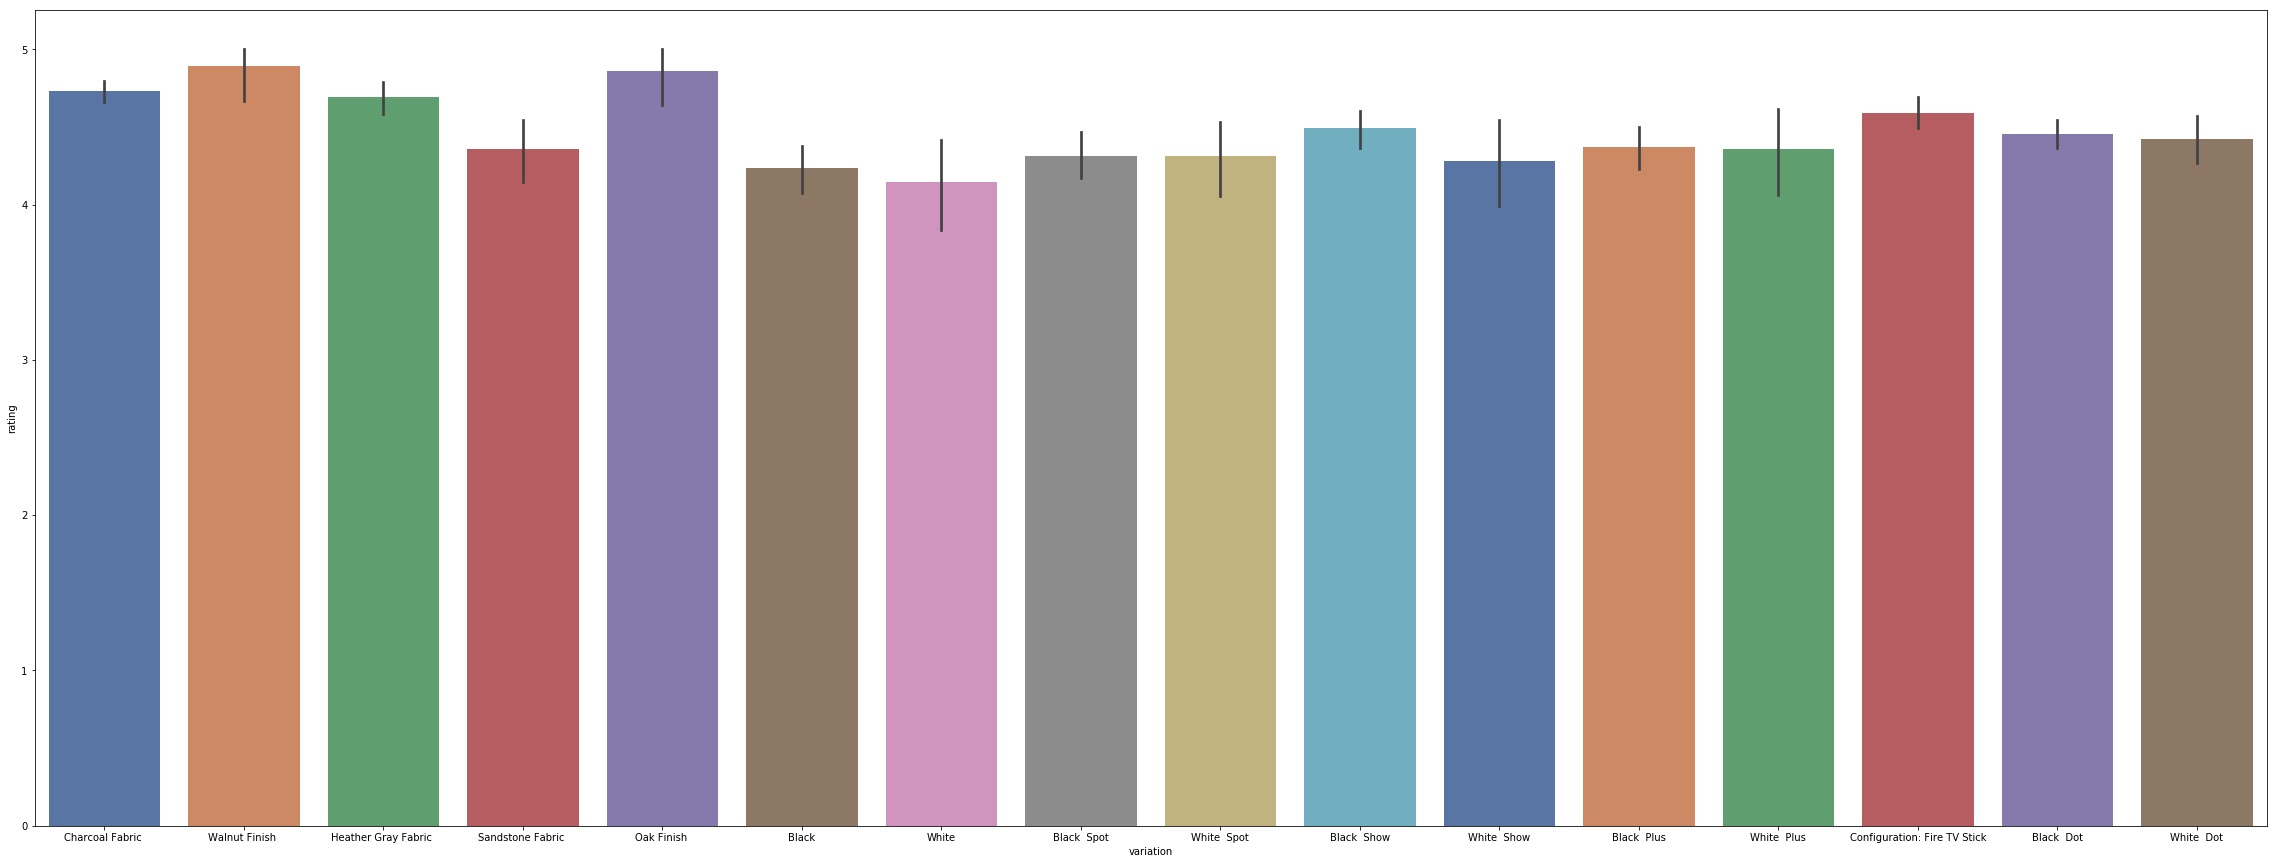

In [59]:
plt.figure(figsize = (40,15))
sns.barplot(x='variation', y = 'rating',
           data = df_aless, palette='deep')